In [2]:
import pandas as pd
import missingno as msno
import numpy as np

In [15]:
PL_dataframe = pd.read_csv("../Data/Raw/PremierLeague.csv")
PL_dataframe.head()

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [16]:
print(PL_dataframe.shape)
PL_dataframe.columns

(12160, 43)


Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'],
      dtype='object')

In [17]:
PL_dataframe.isnull().sum().sort_values(ascending= False)

Time                      9880
MarketAvgHomeTeam         9880
MarketMaxAwayTeam         9880
MarketAvgOver2.5Goals     9880
MarketAvgUnder2.5Goals    9880
MarketMaxDraw             9880
MarketMaxHomeTeam         9880
MarketMaxUnder2.5Goals    9880
MarketMaxOver2.5Goals     9880
MarketAvgAwayTeam         9880
MarketAvgDraw             9880
B365Over2.5Goals          8877
B365Under2.5Goals         8877
B365HomeTeam              3420
B365AwayTeam              3420
B365Draw                  3420
AwayTeamCorners           2660
AwayTeamShots             2660
HomeTeamYellowCards       2660
Referee                   2660
HomeTeamShotsOnTarget     2660
AwayTeamRedCards          2660
HomeTeamRedCards          2660
HomeTeamFouls             2660
AwayTeamFouls             2660
AwayTeamYellowCards       2660
HomeTeamShots             2660
HomeTeamCorners           2660
AwayTeamShotsOnTarget     2660
HalfTimeAwayTeamGoals      760
HalfTimeHomeTeamGoals      760
HalfTimeResult             760
FullTime

<Axes: >

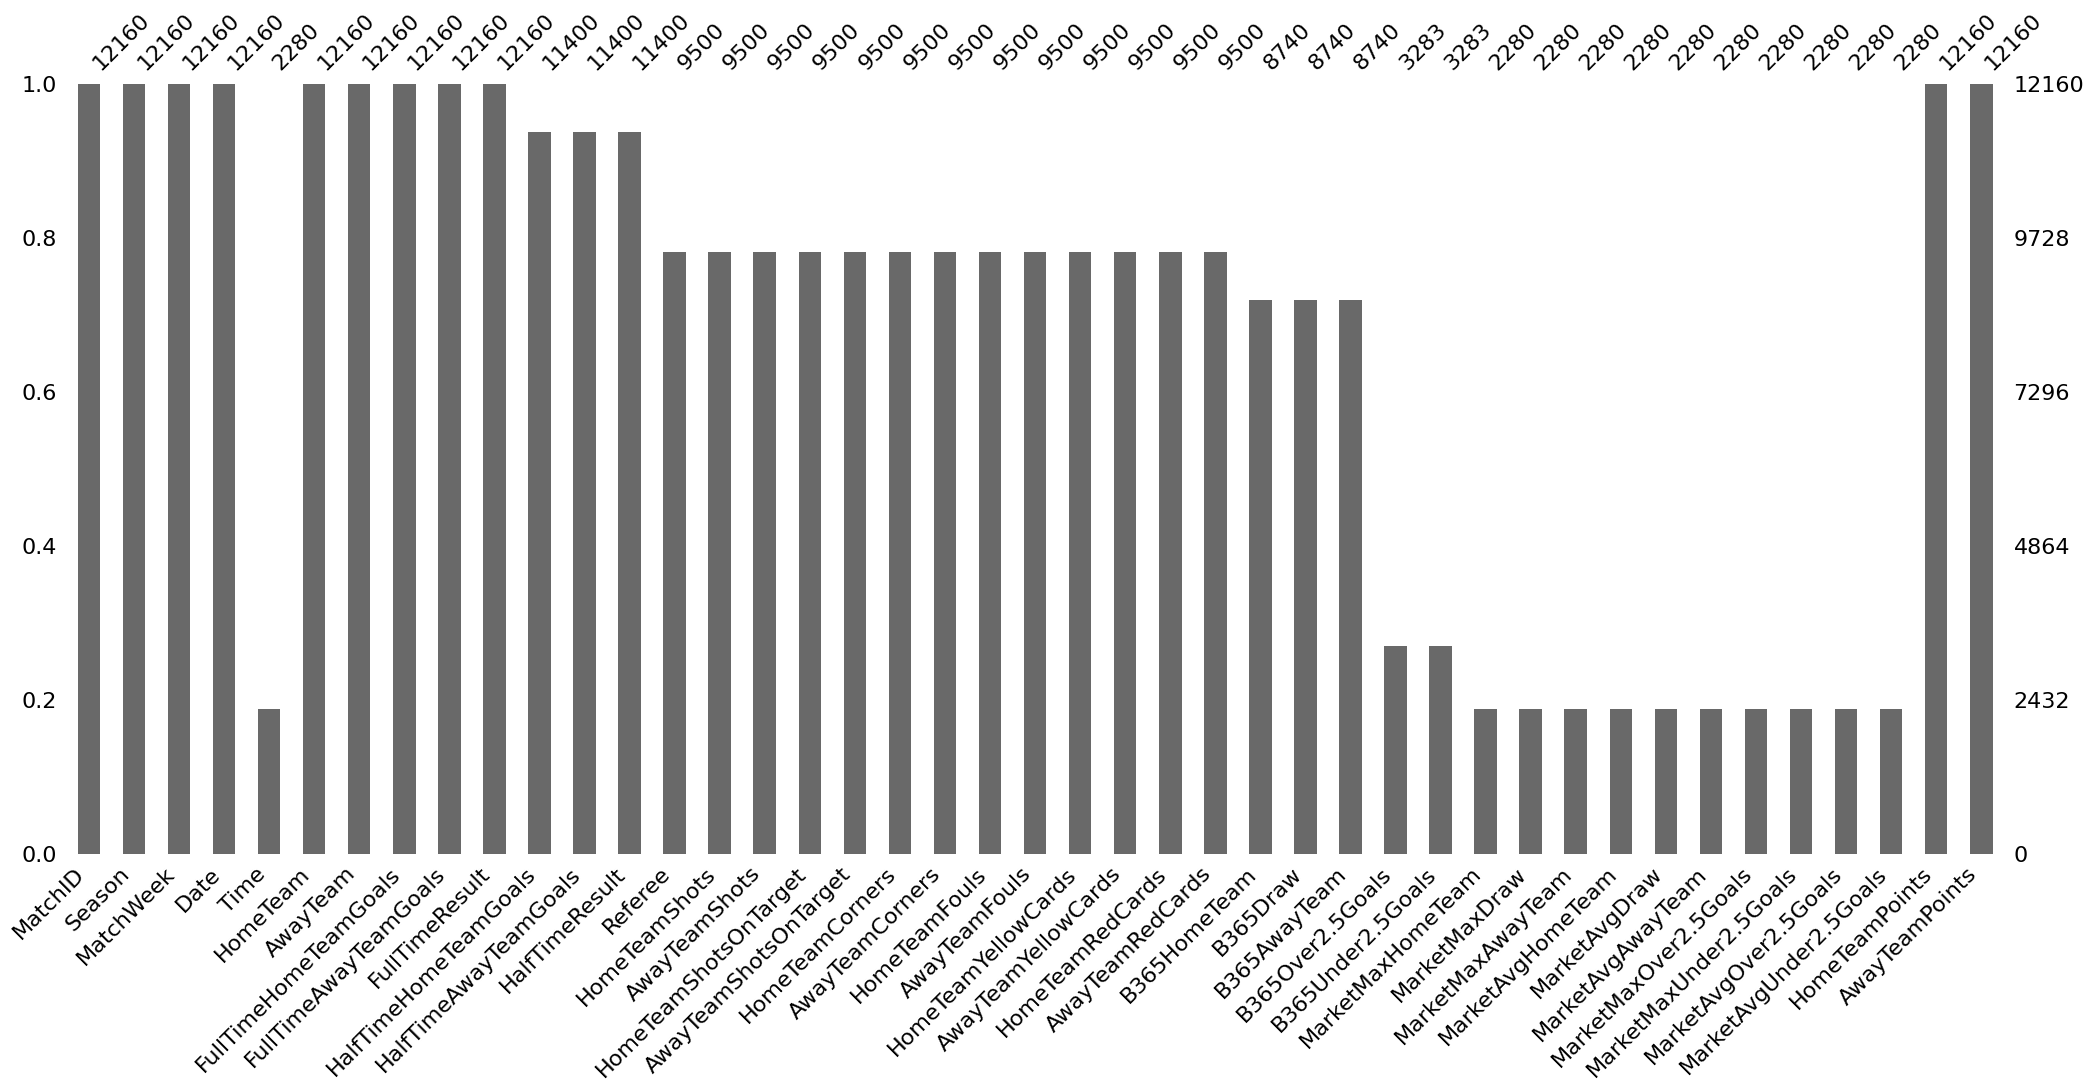

In [18]:
msno.bar(PL_dataframe)

In [19]:
columns_to_keep = ['MatchID', 'Season', 'MatchWeek', 'Date', 'HomeTeam', 'AwayTeam',
                   'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']
PL_dataframe = PL_dataframe[columns_to_keep]
print(PL_dataframe.shape)
PL_dataframe

(12160, 8)


,MatchID,Season,MatchWeek,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,Arsenal,Coventry,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,Aston Villa,QPR,4,1
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,Chelsea,Blackburn,1,2
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,Liverpool,Sheffield Weds,2,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,Man City,Leeds,1,1
...,...,...,...,...,...,...,...,...
12155,2024-2025_Newcastle_Everton,2024-2025,38,2025-05-25,Newcastle,Everton,0,1
12156,2024-2025_Nott'm Forest_Chelsea,2024-2025,38,2025-05-25,Nott'm Forest,Chelsea,0,1
12157,2024-2025_Southampton_Arsenal,2024-2025,38,2025-05-25,Southampton,Arsenal,1,2
12158,2024-2025_Tottenham_Brighton,2024-2025,38,2025-05-25,Tottenham,Brighton,1,4


<Axes: >

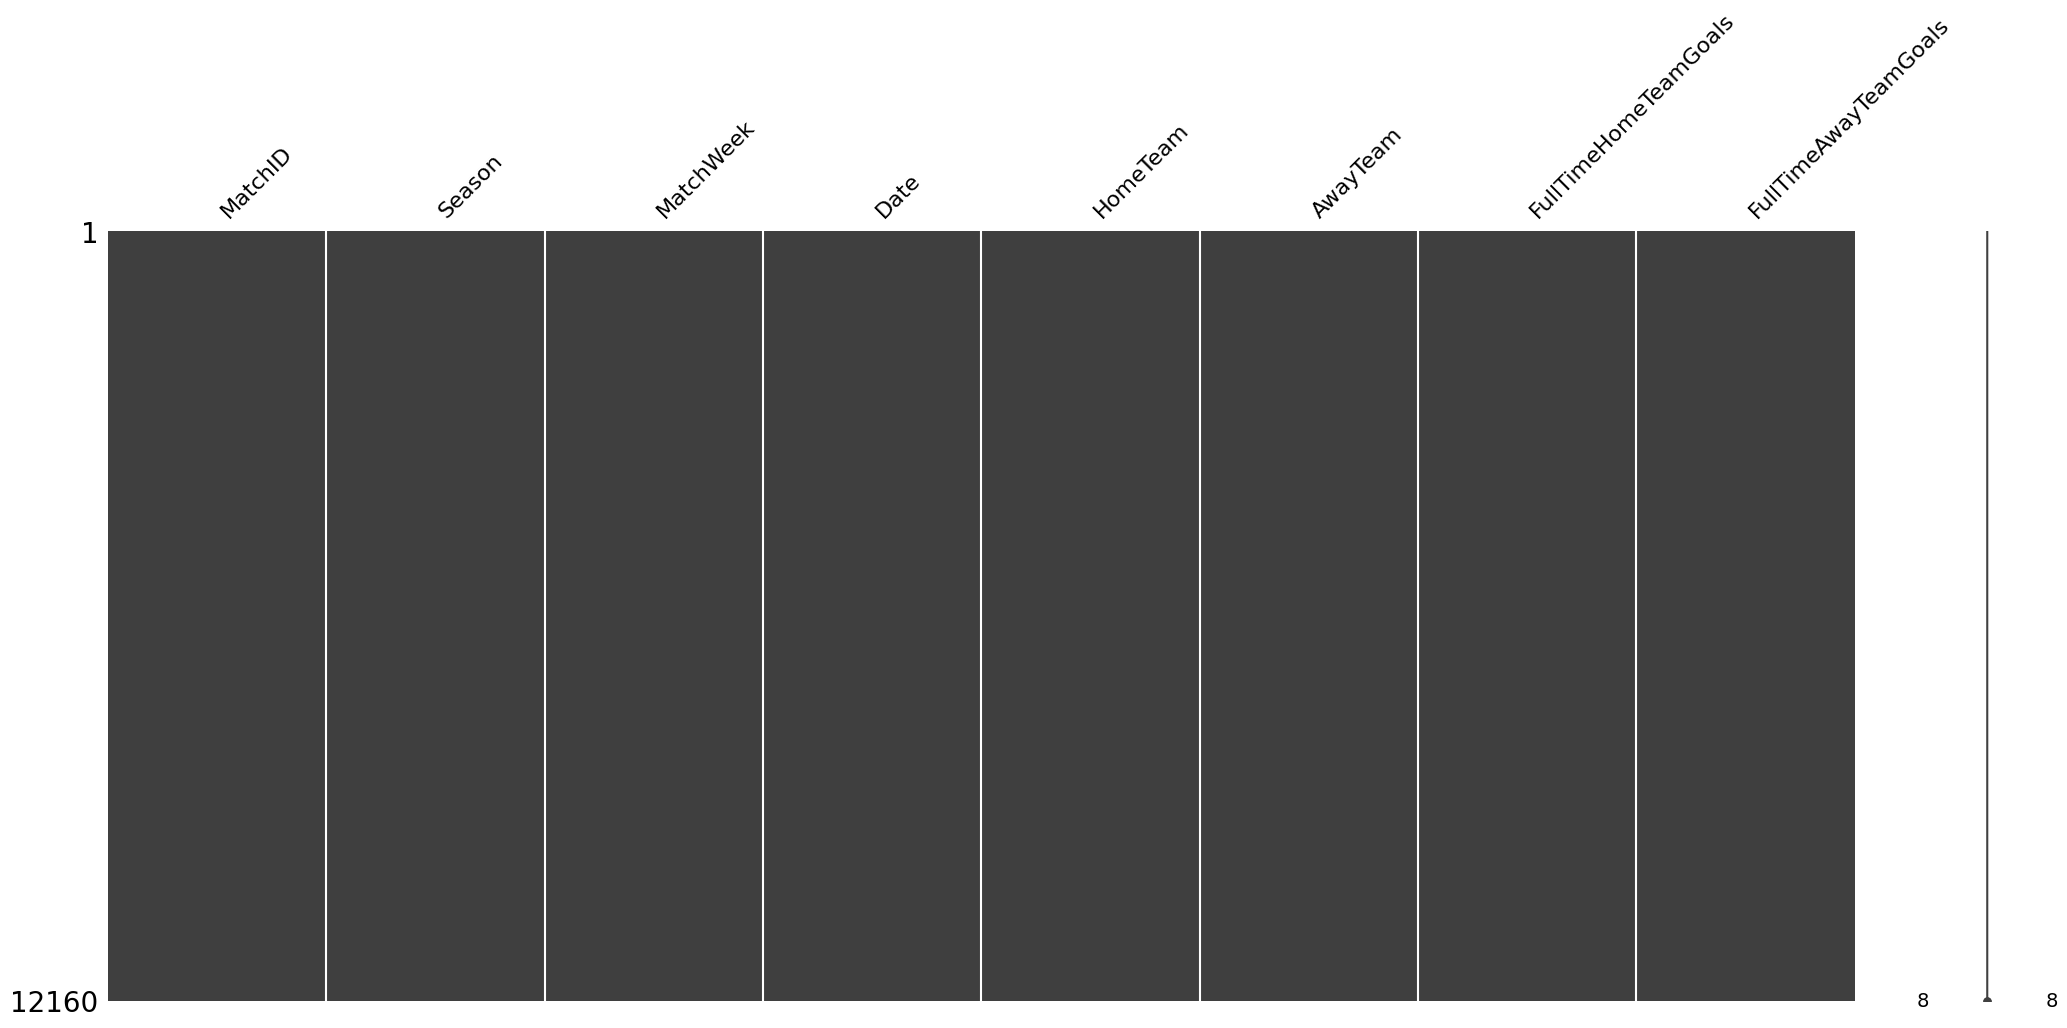

In [20]:
msno.matrix(PL_dataframe)

In [21]:
home_teams = PL_dataframe['HomeTeam'].unique()
away_teams = PL_dataframe['AwayTeam'].unique()
all_unique_teams = set(np.concatenate([home_teams, away_teams]))
print(all_unique_teams)
len(all_unique_teams)

{'Sheffield Weds', 'Norwich', 'Man City', 'QPR', 'Barnsley', 'Blackpool', 'Derby', 'Swansea', 'Newcastle', 'Arsenal', 'Luton', "Nott'm Forest", 'Middlesbrough', 'Cardiff', 'Coventry', 'Reading', 'Aston Villa', 'Sunderland', 'Sheffield United', 'Crystal Palace', 'Ipswich', 'Bradford', 'Leeds', 'Wigan', 'Man United', 'Everton', 'Chelsea', 'Swindon', 'Burnley', 'Oldham', 'Tottenham', 'West Ham', 'Fulham', 'Portsmouth', 'Liverpool', 'Watford', 'Stoke', 'Huddersfield', 'Leicester', 'Bournemouth', 'Blackburn', 'Charlton', 'Wolves', 'Birmingham', 'Brentford', 'Bolton', 'Hull', 'West Brom', 'Brighton', 'Wimbledon', 'Southampton'}


51

In [41]:
elo_ratings = {team: 1500 for team in all_unique_teams}
print(elo_ratings)

{'Sheffield Weds': 1500, 'Norwich': 1500, 'Man City': 1500, 'QPR': 1500, 'Barnsley': 1500, 'Blackpool': 1500, 'Derby': 1500, 'Swansea': 1500, 'Newcastle': 1500, 'Arsenal': 1500, 'Luton': 1500, "Nott'm Forest": 1500, 'Middlesbrough': 1500, 'Cardiff': 1500, 'Coventry': 1500, 'Reading': 1500, 'Aston Villa': 1500, 'Sunderland': 1500, 'Sheffield United': 1500, 'Crystal Palace': 1500, 'Ipswich': 1500, 'Bradford': 1500, 'Leeds': 1500, 'Wigan': 1500, 'Man United': 1500, 'Everton': 1500, 'Chelsea': 1500, 'Swindon': 1500, 'Burnley': 1500, 'Oldham': 1500, 'Tottenham': 1500, 'West Ham': 1500, 'Fulham': 1500, 'Portsmouth': 1500, 'Liverpool': 1500, 'Watford': 1500, 'Stoke': 1500, 'Huddersfield': 1500, 'Leicester': 1500, 'Bournemouth': 1500, 'Blackburn': 1500, 'Charlton': 1500, 'Wolves': 1500, 'Birmingham': 1500, 'Brentford': 1500, 'Bolton': 1500, 'Hull': 1500, 'West Brom': 1500, 'Brighton': 1500, 'Wimbledon': 1500, 'Southampton': 1500}


In [42]:
#Coding the Elo-logic
def updating_elo(home_team, away_team, winner):
    home_team_rating = elo_ratings[home_team]
    away_team_rating = elo_ratings[away_team]
    
    expected_home_team_score = 1 / (1 + 10**((away_team_rating - home_team_rating) / 400))
    expected_away_team_score = 1 - expected_home_team_score
    
    actual_result_for_home_team = 1 if winner == home_team else 0 if winner == away_team else 0.5
    actual_result_for_away_team = 1 - actual_result_for_home_team

    updated_home_team_ratings = home_team_rating + 30*(actual_result_for_home_team - expected_home_team_score)
    updated_away_team_ratings = away_team_rating + 30*(actual_result_for_away_team - expected_away_team_score )

    elo_ratings[home_team] = updated_home_team_ratings
    elo_ratings[away_team] = updated_away_team_ratings


In [43]:
#Making elo ratings history list
elo_ratings_history = []
elo_ratings


{'Sheffield Weds': 1500,
 'Norwich': 1500,
 'Man City': 1500,
 'QPR': 1500,
 'Barnsley': 1500,
 'Blackpool': 1500,
 'Derby': 1500,
 'Swansea': 1500,
 'Newcastle': 1500,
 'Arsenal': 1500,
 'Luton': 1500,
 "Nott'm Forest": 1500,
 'Middlesbrough': 1500,
 'Cardiff': 1500,
 'Coventry': 1500,
 'Reading': 1500,
 'Aston Villa': 1500,
 'Sunderland': 1500,
 'Sheffield United': 1500,
 'Crystal Palace': 1500,
 'Ipswich': 1500,
 'Bradford': 1500,
 'Leeds': 1500,
 'Wigan': 1500,
 'Man United': 1500,
 'Everton': 1500,
 'Chelsea': 1500,
 'Swindon': 1500,
 'Burnley': 1500,
 'Oldham': 1500,
 'Tottenham': 1500,
 'West Ham': 1500,
 'Fulham': 1500,
 'Portsmouth': 1500,
 'Liverpool': 1500,
 'Watford': 1500,
 'Stoke': 1500,
 'Huddersfield': 1500,
 'Leicester': 1500,
 'Bournemouth': 1500,
 'Blackburn': 1500,
 'Charlton': 1500,
 'Wolves': 1500,
 'Birmingham': 1500,
 'Brentford': 1500,
 'Bolton': 1500,
 'Hull': 1500,
 'West Brom': 1500,
 'Brighton': 1500,
 'Wimbledon': 1500,
 'Southampton': 1500}

In [44]:
for index, row in PL_dataframe.iterrows():
    #Before match started
    season = row['Season']
    matchweek = row['MatchWeek']
    date = row['Date']
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    ft_home_goals = row['FullTimeHomeTeamGoals']
    ft_away_goals = row['FullTimeAwayTeamGoals']
    home_team_elo_before_match = elo_ratings[home_team]
    away_team_elo_before_match = elo_ratings[away_team]

    if ft_home_goals > ft_away_goals:
        winner = home_team
    elif ft_home_goals < ft_away_goals:
        winner = away_team
    else:
        winner = None
    print(f"{season} -> Match({index + 1}) "
          f"{home_team} {ft_home_goals} - {ft_away_goals} {away_team} "
          f"| Winner: {winner if winner is not None else 'Draw'}")
    
    updating_elo(home_team, away_team, winner)
    
    #After match result, new elo-ratings of each team
    home_team_elo_after_match = elo_ratings[home_team]
    away_team_elo_after_match = elo_ratings[away_team]

    elo_ratings_history.extend([{
        "Season": season,
        "MatchWeek": matchweek,
        "Date": date,
        "Team": home_team,
        "Full Time Goals": ft_home_goals,
        "Elo-rating before match": round(home_team_elo_before_match, 2),
        "Elo-rating after match": round(home_team_elo_after_match, 2)
    },
        {
        "Season": season,
        "MatchWeek": matchweek,
        "Date": date,
        "Team": away_team,
        "Full Time Goals": ft_away_goals,
        "Elo-rating before match": round(away_team_elo_before_match, 2),
        "Elo-rating after match": round(away_team_elo_after_match, 2)
    }])



1993-1994 -> Match(1) Arsenal 0 - 3 Coventry | Winner: Coventry
1993-1994 -> Match(2) Aston Villa 4 - 1 QPR | Winner: Aston Villa
1993-1994 -> Match(3) Chelsea 1 - 2 Blackburn | Winner: Blackburn
1993-1994 -> Match(4) Liverpool 2 - 0 Sheffield Weds | Winner: Liverpool
1993-1994 -> Match(5) Man City 1 - 1 Leeds | Winner: Draw
1993-1994 -> Match(6) Newcastle 0 - 1 Tottenham | Winner: Tottenham
1993-1994 -> Match(7) Oldham 0 - 3 Ipswich | Winner: Ipswich
1993-1994 -> Match(8) Sheffield United 3 - 1 Swindon | Winner: Sheffield United
1993-1994 -> Match(9) Southampton 0 - 2 Everton | Winner: Everton
1993-1994 -> Match(10) West Ham 0 - 2 Wimbledon | Winner: Wimbledon
1993-1994 -> Match(11) Norwich 0 - 2 Man United | Winner: Man United
1993-1994 -> Match(12) Tottenham 0 - 1 Arsenal | Winner: Arsenal
1993-1994 -> Match(13) Everton 1 - 0 Man City | Winner: Everton
1993-1994 -> Match(14) Ipswich 1 - 0 Southampton | Winner: Ipswich
1993-1994 -> Match(15) Leeds 1 - 0 West Ham | Winner: Leeds
1993-

In [ ]:
# Converting Elo-ratings history into a dataframe
# pd.set_option("display.max_rows", None)
elo_ratings_history_df = pd.DataFrame(elo_ratings_history)
elo_ratings_history_df.head()

,Season,MatchWeek,Date,Team,Full Time Goals,Elo-rating before match,Elo-rating after match
0,1993-1994,1,1993-08-14,Arsenal,0,1500.00,1485.00
1,1993-1994,1,1993-08-14,Coventry,3,1500.00,1515.00
2,1993-1994,1,1993-08-14,Aston Villa,4,1500.00,1515.00
3,1993-1994,1,1993-08-14,QPR,1,1500.00,1485.00
4,1993-1994,1,1993-08-14,Chelsea,1,1500.00,1485.00
5,1993-1994,1,1993-08-14,Blackburn,2,1500.00,1515.00
6,1993-1994,1,1993-08-14,Liverpool,2,1500.00,1515.00
7,1993-1994,1,1993-08-14,Sheffield Weds,0,1500.00,1485.00
8,1993-1994,1,1993-08-14,Man City,1,1500.00,1500.00
9,1993-1994,1,1993-08-14,Leeds,1,1500.00,1500.00


In [46]:
print(elo_ratings)

{'Sheffield Weds': 1445.0393911344781, 'Norwich': 1360.5967740328454, 'Man City': 1783.9336362449683, 'QPR': 1412.5554312388342, 'Barnsley': 1430.1729410510375, 'Blackpool': 1482.784291597174, 'Derby': 1276.9989444098765, 'Swansea': 1473.8331673651344, 'Newcastle': 1667.5209270613066, 'Arsenal': 1779.4023995198029, 'Luton': 1427.7986121793654, "Nott'm Forest": 1626.080922822696, 'Middlesbrough': 1417.1607229912784, 'Cardiff': 1444.7767440397186, 'Coventry': 1442.280321836186, 'Reading': 1424.378644854354, 'Aston Villa': 1694.997942227669, 'Sunderland': 1410.630151530892, 'Sheffield United': 1353.7789181440696, 'Crystal Palace': 1650.28453397194, 'Ipswich': 1403.1202128667933, 'Bradford': 1399.4189259813652, 'Leeds': 1455.1340976858792, 'Wigan': 1504.682658989941, 'Man United': 1550.2074640221497, 'Everton': 1628.4757607729086, 'Chelsea': 1709.403740235923, 'Swindon': 1413.1621065400343, 'Burnley': 1436.3378502898827, 'Oldham': 1463.6355620487109, 'Tottenham': 1506.6471983090287, 'West 

In [47]:
sorted_elo_ratings = sorted(elo_ratings.items(), key = lambda x: x[1], reverse = True)
elo_ratings_dataframe = pd.DataFrame(sorted_elo_ratings, columns= ['Team', 'Ratings'])
elo_ratings_dataframe.insert(0, "Rank", range(1, len(elo_ratings_dataframe) + 1))
elo_ratings_dataframe

,Rank,Team,Ratings
0,1,Liverpool,1794.166823
1,2,Man City,1783.933636
2,3,Arsenal,1779.402400
3,4,Chelsea,1709.403740
4,5,Aston Villa,1694.997942
5,6,Brighton,1669.553615
6,7,Newcastle,1667.520927
7,8,Crystal Palace,1650.284534
8,9,Everton,1628.475761
9,10,Nott'm Forest,1626.080923


In [48]:
elo_ratings_dataframe.to_csv("../Data/Processed/Updated Elo-Ratings.csv", index = False)
elo_ratings_history_df.to_csv("../Data/Processed/Elo-Ratings History.csv", index = False)

In [49]:
def find_team(*given_team):
    row = elo_ratings_dataframe[elo_ratings_dataframe["Team"].isin(given_team)]
    if not row.empty:
        print(row[['Rank', 'Team', 'Ratings']].sort_values(by = 'Rank').to_string(index = False))
    else:
        print("Team not found")

In [50]:
find_team("Athletico", "Chelsea", "Arsenal", "Real Madrid")

 Rank    Team    Ratings
    3 Arsenal 1779.40240
    4 Chelsea 1709.40374
